### Exploratory data analysis (EDA) 


*  is an approach to analyze data in order to: Summarize main characteristics of the data so as to gain better understanding of the data set and Uncover relationships between different variables.


In this analysis i am using the the Weather dataset that was downloaded from Kaggle 
* I will Perform Exploratory Data Analysis (EDA) to uncover interesting patterns, insights, and potential anomalies in dataset. 

*  In order to do that I will, under take the folowing tasks, i.e Data Overview and Cleaning, Statistical Summary, Data Visualization, Create correlation matrices and heatmaps and then Analyze and describe any trends or patterns observed in the data After which i will provide Insights and Conclusions from the data. 

## Importing libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib  inline

In [6]:
# Importing the dataset 
df = pd.read_csv("Weather_Data.csv")
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### Data Overview and Cleaning:
Here we shall answer the following Questions 
* What are the key characteristics of the dataset? (e.g., number of records, features, data types)
* Identify and handle any missing or null values. Describe your approach and reasoning.
* Check for and address any duplicate records.

In [7]:
df.shape #to determine the dimensions of a DataFrame. It returns a tuple representing the number of rows and columns in the DataFrame.

(8784, 8)

In [8]:
#checking for data types
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [9]:
#Obtaining Information about that datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [10]:
#Descriptive statistics 
df.describe() #describe function automatically computes basic statistics for all numerical variables.

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [11]:
df.describe(include = "all") #provides a comprehensive summary of a DataFrame, including all data types. 
#This method is useful for getting an overview of the dataset, including both numerical and categorical features.

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
unique,8784,NaN,NaN,NaN,NaN,NaN,NaN,50
top,1/1/2012 0:00,NaN,NaN,NaN,NaN,NaN,NaN,Mainly Clear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2106
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN
50%,NaN,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,NaN
75%,NaN,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,NaN


In [12]:
#Checking for Null values 
df.isna().sum().sum()

0

In [13]:
#detecting duplicates
#I will use "Date/Time" because it is the dataset shouldnt have weather patterns for the same date and time.
df["Date/Time"].duplicated().sum()

0

## Statistical Summary:
Here we shall 
* Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.
* Identify and describe any significant outliers in the data.

In [14]:
df.describe() #Provides a statistical summary of the numerical features in a DataFrame.

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [16]:
df.describe().T # Transposes the output of the df.describe() method - it swaps the rows and columns of the summary statistics DataFrame. 
# This can make it easier to view and compare the summary statistics for each numerical feature, especially if you have a lot of features.

,count,mean,std,min,25%,50%,75%,max
Temp_C,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew Point Temp_C,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Rel Hum_%,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind Speed_km/h,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility_km,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Press_kPa,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


# Identify and describe any significant outliers in the data.
* We can use Box Plots or Scatter Plots to identify outliers.. In this analysis i will use Box plots 
* I will reate box plots for numerical features. NB: Outliers are typically shown as points outside the “whiskers” of the box plot. 
* The whiskers usually extend to 1.5 times the interquartile range (IQR) from the quartiles.
* Scatter Plots are used or pairs of variables, scatter plots can help spot outliers that deviate significantly from the general trend.

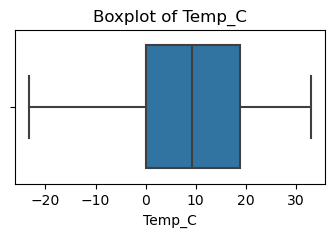

In [48]:
# Visualize outliers using boxplots
plt.figure(figsize=(4, 2))
sns.boxplot(x=df["Temp_C"])  
plt.title('Boxplot of Temp_C')
plt.xlabel("Temp_C")
plt.show()

In [49]:
# Because we need a plot for each of the columns that has numerical features lets filter them out# Visualize outliers using boxplots

numerical_features = df.select_dtypes(include=['float64', 'int64']) # filters the DataFrame to include only columns 
#with data types float64 (floating-point numbers) and int64 (integer numbers), which are commonly used for numerical data.

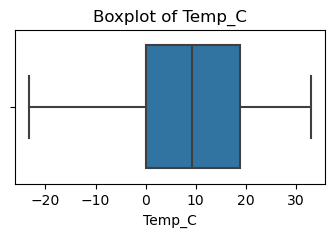

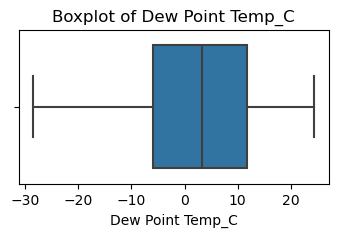

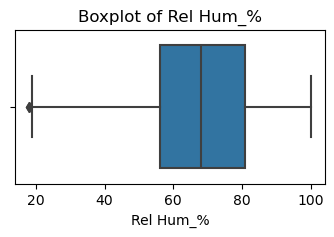

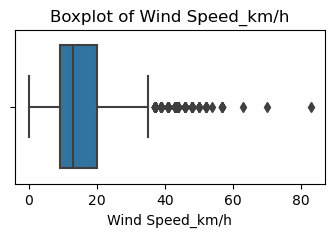

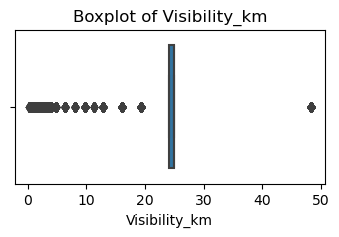

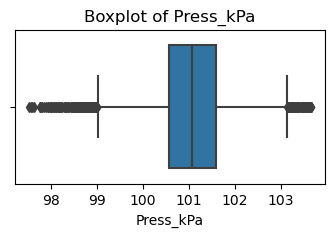

In [60]:
# Lets use a for loop to make the plots 
for col in numerical_features.columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=numerical_features[col])  # Use numerical_features[col] directly
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

## Data Visualization:
Here I will
* Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).
* Plot time series graphs to visualize trends over time which willHighlight any notable patterns or seasonal variations.
* Create correlation matrices and heatmaps to identify relationships between different weather parameters.

c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


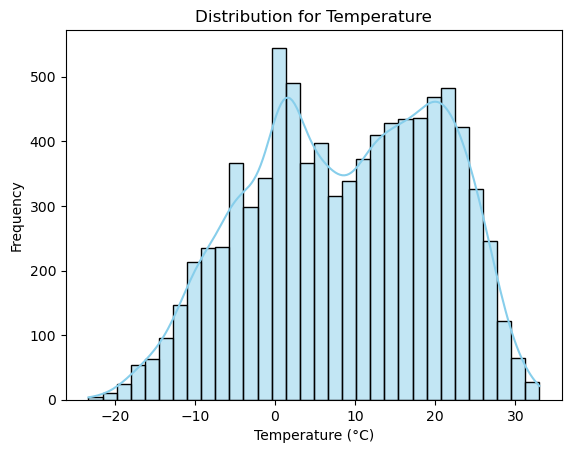

In [80]:
# Univariate Analysis 

# Plot the histogram
sns.histplot(x=df["Temp_C"], kde=True, color='skyblue')

# Add title and labels
plt.title('Distribution for Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Univariate analysis for humidity and wind speed
* In this intance i will use 'Axes' - object in Matplotlib that represents a single plot or graph. 
* It is where you draw your data, labels, and other graphical elements. Each Axes object is a part of a Figure, and a Figure can contain multiple Axes.


c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


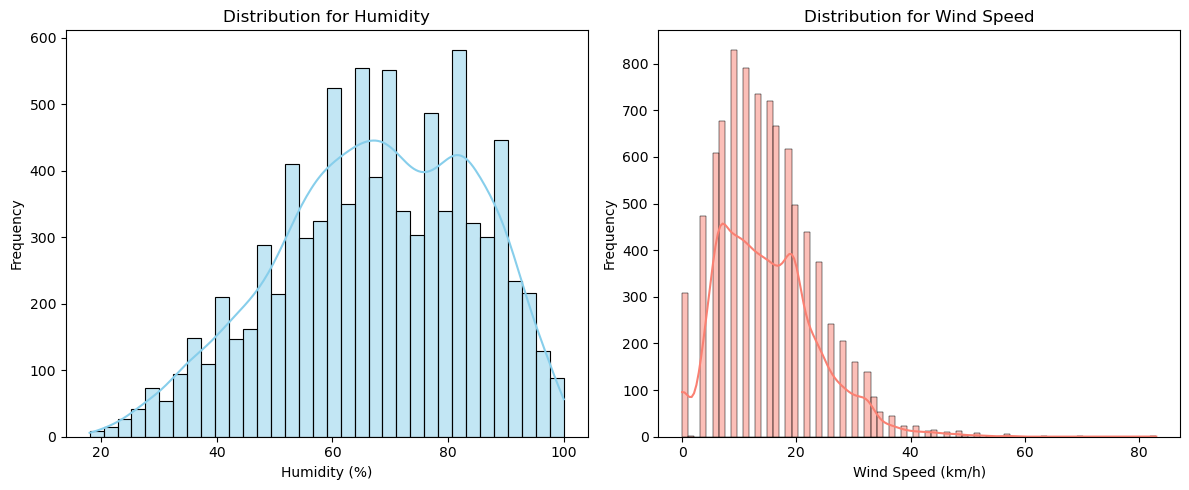

In [115]:
# Create a figure and a grid of subplots (2 plots side by side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the first histogram on the first subplot
sns.histplot(x=df["Rel Hum_%"], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution for Humidity')
axes[0].set_xlabel('Humidity (%)')
axes[0].set_ylabel('Frequency')

# Plot the second histogram on the second subplot
sns.histplot(x=df["Wind Speed_km/h"], kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribution for Wind Speed')
axes[1].set_xlabel('Wind Speed (km/h)')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Plot time series graphs to visualize trends over time which will Highlight any notable patterns or seasonal variations.

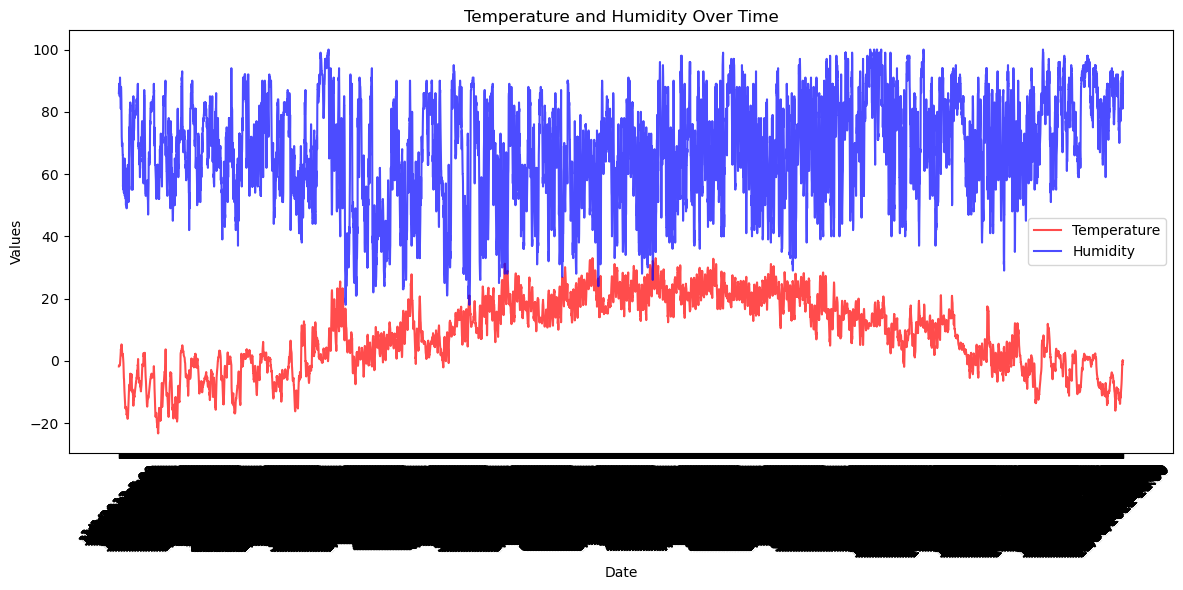

In [112]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot temperature
ax.plot(df['Date/Time'], df['Temp_C'], label='Temperature', color='r', alpha=0.7)

# Plot humidity
ax.plot(df['Date/Time'], df["Rel Hum_%"], label='Humidity', color='b', alpha=0.7)

# Add title and labels
ax.set_title('Temperature and Humidity Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

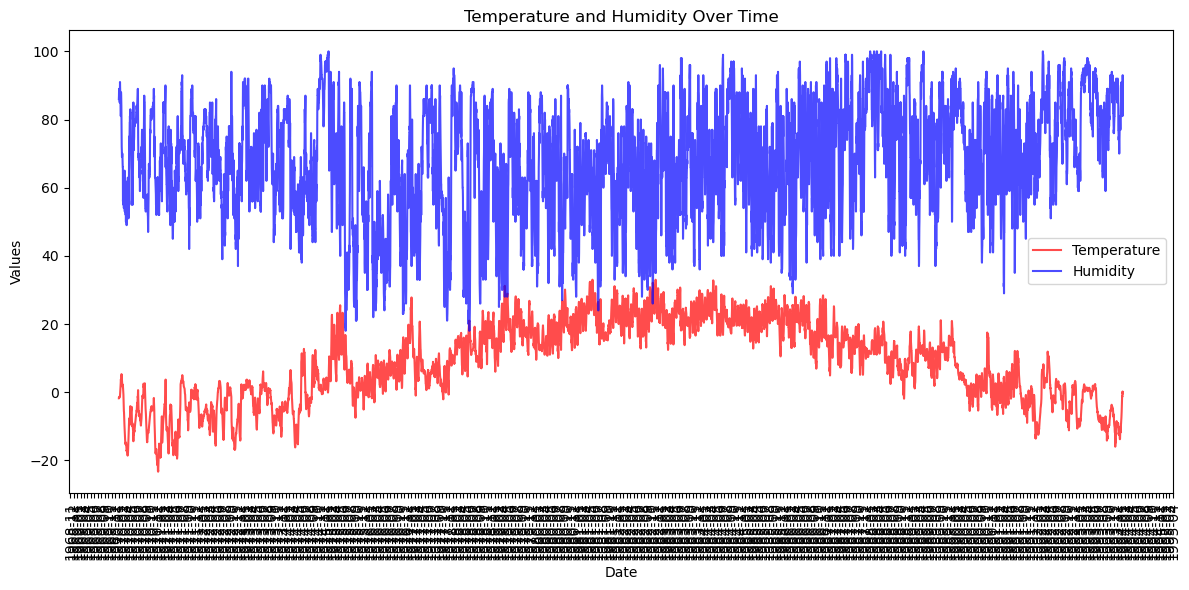

In [122]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot temperature
ax.plot(df['Date/Time'], df['Temp_C'], label='Temperature', color='r', alpha=0.7)

# Plot humidity
ax.plot(df['Date/Time'], df["Rel Hum_%"], label='Humidity', color='b', alpha=0.7)

# Add title and labels
ax.set_title('Temperature and Humidity Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.legend()

# Set date format and locator for better readability
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and format date labels
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Create correlation matrices and heatmaps to identify relationships between different weather parameters.

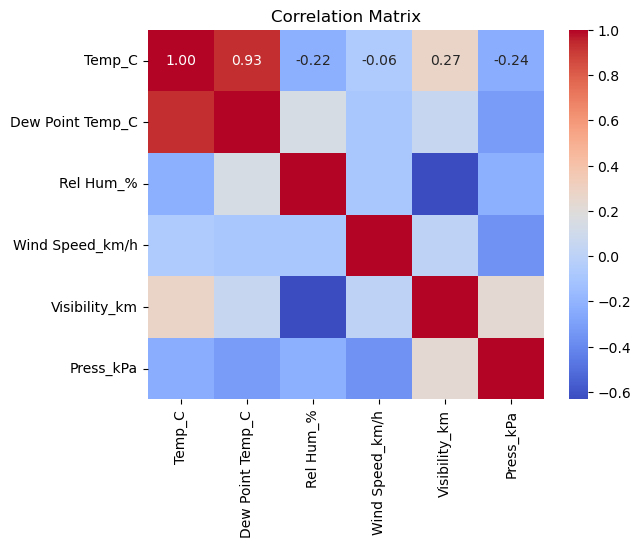

In [17]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()